<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/Yahoo_Finance_Medium_SMA_LMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

### Downloading historical stock prices in Python
- We will be looking at a quick and automated way to download the historical stock prices in Python. This article will cover creating the analytical dataset to aid in analyzing the stock market

### Step 1: Download the required packages
- What we need is pandas (the bread and butter for data science in python), yfinance for downloading the historical stock prices from yahoo finance, datetime and time which provides functions to manipulate dates and times, requests for sending HTTP requests and io for handling strings.

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

### Step 2: Set the date range
- Next, we want to provide the start and end dates, during which period we want the daily stock prices. Below, I have provided the start date as 1st February 2020 (approximate beginning of this year’s misery) and end date as 11th October 2020, the current date when I executed this code. You could set the start and end date to anything you like- but what I am trying to analyze is the price fluctuation from pre-pandemic times till now.

In [ ]:
start = datetime.datetime(2020,2,1)
end = datetime.datetime(2020,10,11)

### Step 3: Get the Stock Ticker Symbols
- We want to get the stock ticker symbols listed on NASDAQ. You can skip this step if you know exactly the companies you want the historical stock prices for (example: Tesla -> TSLA, Facebook -> FB etc). But the idea here is to look beyond the popular companies and unearth some interesting price movements for the not-so-well-known companies.
The code below would access the URL containing a CSV file with the company names and their stock symbol, and convert it to a pandas dataframe.

In [ ]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

- Some of the companies provided in this dataset may be delisted or may not be available to download.

- Let’s take a look at how this dataset looks like:

- From this dataset, let’s extract only the Symbols and convert them into a list.

In [ ]:
Symbols = companies['Symbol'].tolist()

### Step 4: Download the historical stock prices
- Iterate over each stock symbol and using yahoo finance API, download the daily stock prices between the start and end dates.

- Append all the individual stock info and create the analytical dataset. Also, note that some symbols may be unavailable to download, for which we have added the ‘try’ and ‘except’ clauses to handle them.

In [ ]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

In [ ]:
# This is how the final dataset looks like.
stock_final.head()

-------------------------------------------------------------

https://towardsdatascience.com/data-science-in-finance-56a4d99279f7

- The moving average strategy suggests **buying** a stock when **shorter SMA crosses over longer SMA** and **selling** it when **shorter SMA crosses down the longer one**. The picture below shows the **buy signal** (SMA_20, the **red line crosses over the blue line**, SMA_50) and the exit point as vice versa.

- image 1

### 1- Data extraction and preparation

- Historical stock price data can be found from various sources but the simplest one is **Yahoo Finance**. To do this, we need to **import yfinance library** and other related libraries which will be used on data manipulation using pandas.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf

- First of all, we need to define the time range that we will examine the strategy. To use **yfinace library**, the **date should be in the format of YYYY-MM-DD**. Define the start date as your own favorite time. You can do the same for the end date but I prefer the **end date as today**. We can define it as below:

In [ ]:
start = '2016-01-01'                # format: YYYY-MM-DD
end = dt.datetime.now()             # today

- In the next step, store your favorite stock symbol ticker string in a stock variable. We are going to use it in yahoo finance library to download as a data frame:

In [ ]:
stock='AMD'
df = yf.download(stock,start, end, interval='1d')
df.head()

### 2- Moving Average Calculation

- Let’s define the short and long simple moving average, SMA variable, and store them in the list named SMAs here.

In [ ]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

- We can calculate **moving average** one by one for **each SMA using rolling and mean function** but to make it more flexible for more than two SMAs, we may use **for loop** such as:

In [ ]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

### 3- SMAs Relative Position Recognition

- if **shorter SMA is higher than longer SMA**, we are in the **up-trend** area and appropriate to have a position and sell it in the opposite condition.

In [ ]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i]):                          #line 9
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)                      #line 23
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

- This is a for loop block of code that will iterate over data set we previously read into df variable. After defining close price, short and long SMAs from the data frame, it will go into two different branches using if statement based on short and long SMA values (line 9). If **short SMA is above long SMA, it prints out the trend direction (‘Up trend’)** and if there is not existing position in the portfolio, it will buy a position (signal) based on the close price of that day. If short SMA reads smaller values than long SMA, it is in Down trend. If we have already a position, we should sell at the adjusted close price. Using append function in pandas (line 23), we will store the results to a percentChange variable list as defined in the previous line. The last part of block code, starting line24, is to examine whether there is an open position we are counting down to end of the data frame.

### 4- Statistics

- After defining some variables such as gains and losses with the quantity of them, we may use for loop again over individual values in perecntChange to find out statistical information. Positive values in the list refer to the gain and will be added up in gains variable. The negative values are losses and will be stored in losses variable. We can print out the total return as percent and round the value up to 2 decimal places.

In [ ]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

- To calculate average gain and loss, we may simply use if statement to see if the number of gains is bigger than zero or not. If so, the average gain can be calculated by gains divided by a number of gains. If the number of losses is a positive value, it will calculate average losses as well. Maximum gain and loss can also be an attractive point of the trades strategy.

In [ ]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

- For this example, the average gain for a single stock share is 62 dollars, the average loss is almost 8 dollars. The maximum return is 153 and the maximum loss is 16 dollars.

- Batting average is calculated by dividing the number of gains over the total number of trades. This can be a sign of accuracy to enter for a position ranges between 0 and 1. 1 is the most accurate bat.

In [ ]:
if(numGains>0 or numLosses>0):
    batAvg=numGains/(numGains+numLosses)
else:
    batAvg=0
print("Batting Avg: "+ str(batAvg))

### 5- Plotting

- Although you can use seaborn or matplotlib libraries to plot the stock price, the mplfinance library is perfectly designed specifically for the stock price plot. Its function accept various attributes such as figure size, price plotting type (line, candlestick, …) and moving average.

In [ ]:
mpf.plot(df, type = 'ohlc',figratio=(16,6), 
         mav=(short_sma,long_sma), 
         volume=True, title= str(stock), 
         style='default')

------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# style
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving streaming_stocks_data.csv to streaming_stocks_data.csv


In [ ]:
# Loading Stocks data
df = pd.read_csv("streaming_stocks_data.csv")
df.columns = ['timestamp','last_price','volume','scrip_id']
df.head()

,timestamp,last_price,volume,scrip_id
0,2020-08-03 09:16:00+05:30,100.65,74643,14
1,2020-08-03 09:17:00+05:30,100.60,58859,14
2,2020-08-03 09:18:00+05:30,100.65,30118,14
3,2020-08-03 09:19:00+05:30,100.60,49734,14
4,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
df = df.set_index(pd.DatetimeIndex(df['timestamp'].values))
df.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
df1 = df[0:374]
df1.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [ ]:
for i in SMAs:
    df1["SMA_"+str(i)]= df1['last_price'].rolling(window=i).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df1.index:
    SMA_short = df1['SMA_20']
    SMA_long = df1['SMA_50']
    close = df1['last_price'][i]
    
    if(SMA_short[i] > SMA_long[i]):                               # line 9
        print('Up trend')
        if(position==0):
            buyP=close   # buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)                           # line 23
    if(counter==df1["last_price"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Up trend
Buy at the price101.35
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Down trend
Sell at the price101.8
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Do

In [ ]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df1.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2020-08-03 09:16:00+05:30 up to now with 3 trades:
SMAs used: [20, 50]
Total return over 3 trades: -0.35%


In [ ]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 0.44400592007893813
Average Loss: -0.39525730293522576
Max Return: 0.44400592007893813
Max Loss: -0.39564787339266827
Gain/loss ratio: 1.1233338809471693


In [ ]:
if(numGains>0 or numLosses>0):
    batAvg=numGains/(numGains+numLosses)
else:
    batAvg=0
print("Batting Avg: "+ str(batAvg))

Batting Avg: 0.3333333333333333


In [ ]:
mpf.plot(df1, type = 'ohlc',figratio=(16,6), 
         mav=(short_sma,long_sma), 
         volume=True, title= str(stock), 
         style='default')

NameError: ignored

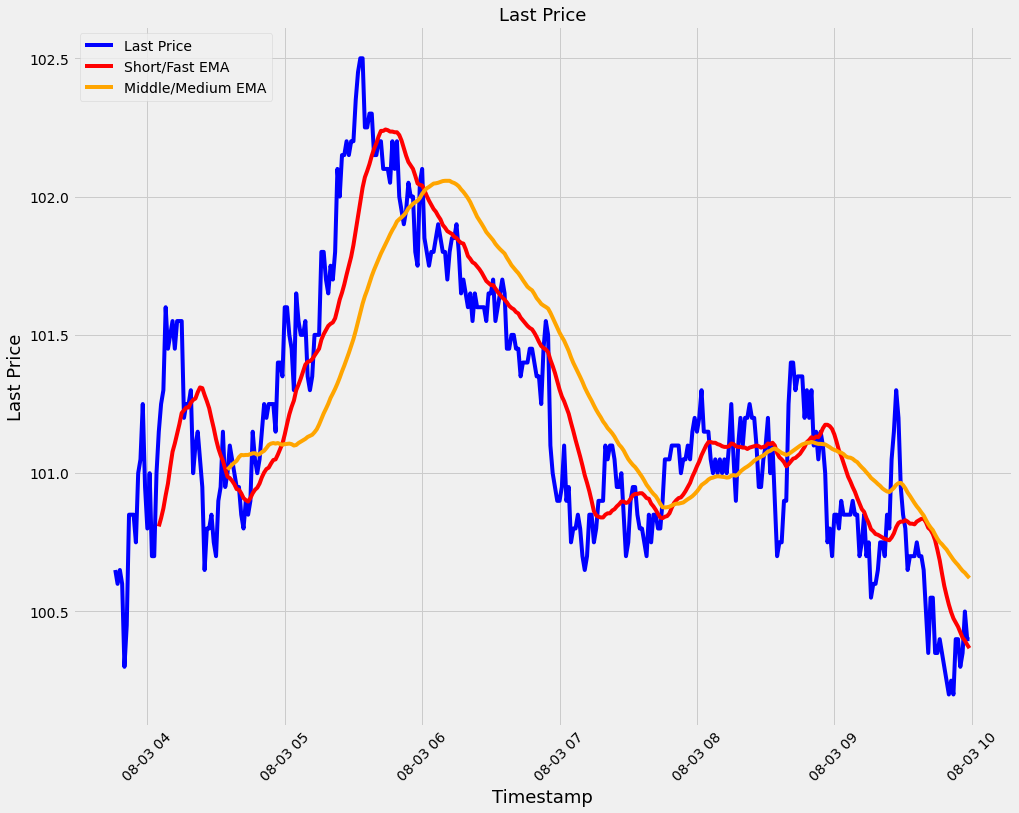

In [ ]:
# Visualize the Last Price and the exponential moving averages
plt.figure(figsize=(15,12))
plt.title('Last Price', fontsize=18)
plt.plot(df1['last_price'], label='Last Price', color='blue')
plt.plot(SMA_short, label='Short/Fast EMA', color='red')
plt.plot(SMA_long, label='Middle/Medium EMA', color='orange')

plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()